# MASCHINELLES LERNEN MIT EMPIRISCHEN DATEN

## Hands-On | Überwachtes Lernen

## Vorbereitung

* Verwenden Sie den vorverarbeiteten Titanic-Datensaz aus dem Hand-On "Data Exploration & Preprocessing".
* Gehen Sie die Fragen im Online-Hands-On der Reihe nach durch.
* Beantworten Sie die Fragen, indem Sie die unten vorgesehenen Felder mit Text und Code ergänzen.

## Literatur

* S. Raschka & V. Mirjalili (2018) Datenvorverarbeitung. In: S. Raschka & V. Mirjalili. Machine Learning with Python and Scikit-earn and TensorFlow. S. 125-158 (Kapitel 4)
* A. Famili et al (1997) Data Preprocessing and Intelligent Data Analysis. In: Intelligent Data Analysis Journal

## Aufgabe 1 | Überprüfung des Datensatzes

Stellen Sie sicher, dass Ihre Daten zur Anwendung von ML-Verfahren geeignet sind. Ist das aktuell der Fall? Begründen Sie.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

train = pd.read_csv("./Titanic/train.csv")
test = pd.read_csv("./Titanic/test.csv")

train_label = train['Survived']
train = train.drop('Survived', axis=1)

train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

Noch nicht, Datenbereinigung (NaN - Types) muss durchgeführt werden

In [2]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(train)
train_imputed = imp.transform(train)
test_imputed = imp.transform(test)

train = pd.DataFrame(train_imputed, columns=train.columns)
test = pd.DataFrame(test_imputed, columns=test.columns)

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

enc = OneHotEncoder(handle_unknown='ignore')
wholeset = train + test
#wholeset.drop('Name', axis=1)
enc.fit(wholeset)
train = enc.transform(train)
test = enc.transform(test)

X_train, X_test, y_train, y_test = train_test_split(train, train_label, stratify=train_label, train_size=0.8, test_size=.2)

## Aufgabe 2 | Train-Test Aufteilung

### 2.1

Wie ist der Datensatz in Test und Trainingsdaten unterteilt? Wie groß ist der Anteil der Trainingsdaten?

In [4]:
print(train.shape)
print(test.shape)
print(train.shape[0]/(train.shape[0]+test.shape[0]))

(891, 1509)
(418, 1509)
0.680672268907563


891 Samples für training, 418 Samples für Test

Verhältniss ~3:2

### 2.2

Ist die Train-Test-Aufteilung des Datensatzes eher günstig oder nicht so günstig für die Anwendung mit ML-Verfahren? Begründen Sie kurz.

für große Datensets wäre eine 2:3 Aufteilung besser, aber dies ist ein vergleichsweise kleines Datenset.
Eine Möglichkeit trotzdem Statistische Relevanz zu erreichen wäre Cross-Validierung

### 2.3

Würden Sie die Anwendung von Kreuzvalidierung (Cross Validation) mit dem Datensatz in Betracht ziehen? Begründen Sie kurz.

klar, es gibt kaum Gründe dies nicht zu tun

## Aufgabe 3 | Datencharakterisierung

### 3.1

Charakterisieren Sie kurz Ihre Trainingsdaten in Stichpunkten.

12 Features, davon 1 id 1 zieldaten (surviving)

### 3.2

Charakterisieren Sie kurz Ihre Testdaten in Stichpunkten.

11 Features, davon 1 id

### 3.3

Um was für eine Zielvariable handelt es sich (Skala)?

- a) Kategorial
- b) Es existiert keine Zielvariable
- c) Numerisch
- d) Ordinal

Kategorial:

0 oder 1

## Aufgabe 4 | Metriken zur Evaluierung

Im folgenden werden Sie einen Klassifikator trainieren und auf die Testdaten anwenden.
Wie wollen Sie den Lernerfolg feststellen?


Antworten:
- F-1 Score
- Sensitivity/Specificity
- ROC-Kurve/AUC-Metrik
- Precision/Recall
- Accuracy

- average precision ist ein gutes maß zur Qualitätsbestimmung.
- besonders Precision/Recall und die PR-Kurve sind gut geeignet um den Fortschritt zu überprüfen

## Aufgabe 5 | Dummy Methode

### 5.1

Sie werden im ersten Schritt einen Dummy-Klassifier benutzen, um eine zufällige Klassifizierung für die Testdaten zu imitieren.
Welche der folgenden Vorhersagestrategien für den Dummy-Classifier Führt dazu, dass die Klassenverteilung der Trainingsdaten in der Vorhersage widergespiegelt werden?
Antworten:
- stratified
- uniform
- constant
- prior
- most_frequent

stratified

### 5.2

Nutzen Sie einen Dummy-Classifier, um eine zufällige Klassifizierung für die Validierungsdaten zu imitieren. Speichern Sie die erhaltenen Werte für jedes Sample in einer Datei.

In [5]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified").fit(train, train_label)
print(dummy_clf.score(train, train_label))

0.5252525252525253


In [6]:
pd.DataFrame(dummy_clf.predict(train)).to_csv(r'supervised/fromdummy.csv', index = False)

## Aufgabe 6 | Baseline Methode

### 6.1

Um den Erfolg ihres eigentlichen Lernverfahrens einzuschätzen, bietet es sich an, zunächst eine einfache Vergleichsmethode anzuwenden.
Welche der folgenden Methoden bietet sich besonders gut als Vergleichsmethode an?
Antwort:
- Multilayer Perceptron (MLP)
- Random Forest
- Support Vector Machine (SVM)
- Entscheidungsbaum

Entscheidungsbaum, da er einfach zu implementieren ist / wenige Parameter

### 6.2

Wenden Sie einen Entscheidungsbaum auf die Trainingsdaten an, um die zugehörigen Zielwerte zu lernen.

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
#tree_clf = DecisionTreeClassifier().fit(train, train_label)
print("Accuracy on Subsample: " + str(tree_clf.score(X_test, y_test)))
print("Accuracy on All: " + str(tree_clf.score(train, train_label)))

Accuracy on Subsample: 0.6536312849162011
Accuracy on All: 0.8002244668911336


### 6.3

Wenden Sie den trainierten Entscheidungsbaum auf die Testdaten an.
Speichern Sie die erhaltenen Werte für jedes Sample in einer Datei.

In [8]:
pd.DataFrame(tree_clf.predict(X_test)).to_csv(r'supervised/fromdectree.csv', index = False)
pd.read_csv("./supervised/fromdectree.csv")

0
0    0
1    0
2    1
3    0
4    1
..  ..
174  0
175  0
176  0
177  0
178  0

[179 rows x 1 columns]

### 6.4

Dokumentieren Sie alle (auch Default-)Parameter des Algorithmus im Notebook.
Diese müssen nicht explizit erklärt werden; machen Sie sich dennoch Gedanken über deren Auswirkungen für das Verfahren.

Alle Parameter sind default:
- gini criterion
- best splitter
- no maximal depth
- min_samples_split = 2
- min_samples_leaf = 1
- no max features
- etc.

## Aufgabe 7 | Fortgeschrittene Methode

### 7.1

Wenden Sie ein von Ihrem Betreuer vorgegebenes Lernverfahren auf die Trainingsdaten an, um die zugehörigen Zielwerte zu lernen.
Welches Verfahren wurde Ihnen zugwewiesen?
- Multilayer Perceptron (MLP)
- Support Vector Machine (SVM)
- Random Forest

Multilayer Perceptron (MLP)

### 7.2

Wenden Sie das vorgegebene Lernverfahren auf die Testdaten an.
Speichern Sie die erhaltenen Werte für jedes Sample in einer Datei.

In [9]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', max_iter=350).fit(X_train, y_train)
#mlp_clf = MLPClassifier(solver='lbfgs', max_iter= 300).fit(train, train_label)#random_state=1

print(mlp_clf.score(X_test, y_test))#train, train_label
print(mlp_clf.score(train, train_label))

pd.DataFrame(mlp_clf.predict(X_test)).to_csv(r'supervised/frommlp.csv', index = False)
#tree_clf.predict(test)#save this into file

0.6759776536312849
0.8047138047138047


### 7.3

Dokumentieren Sie alle (auch Default-)Parameter des Algorithmus im Notebook.
Diese müssen nicht explizit erklärt werden; machen Sie sich dennoch Gedanken über deren Auswirkungen für das Verfahren.

- Das Multilayer-Perzeptron besitz verschiedene Optimizierer, lbfgs ist besonders geeignet für kleine Datensets
- max_iter wurde auf 350 (default = 200) erhöht, sodass lbfgs convergieren kann (+ max 50 iterationen als Buffer)
- fester seed für Zufallsfunktion entfernt
- sonst nur default Werte

## Aufgabe 8 | Auswertung der Ergebnisse

### 8.0 * Aufgabe aus Synchronübung

Vergleichen Sie die Ergebnisse für die Validierungsdaten von Dummy-Classifier, Entscheidungs- baum und zugewiesenem Lernverfahren mit den tatsächlichen Zielwerten, indem Sie                                                  
- a) für jedes Verfahren die jeweilige Accuracy bestimmen.

In [10]:
#Accuracy
print("dummy: " + str(dummy_clf.score(train, train_label)))
print("tree:  " + str(tree_clf.score(train, train_label)))
print("mlp:   " + str(mlp_clf.score(train, train_label)))

dummy: 0.5207631874298541
tree:  0.8002244668911336
mlp:   0.8047138047138047


- das Multilayer-Perzeptron erreicht bei Konvergenz ähnlich gute Qualität wie Entscheidungsbäume, benötigt aber deutlich länger
- beide sind deutlich besser als die dummy-Funktion

- b) für jedes Verfahren eines Accuracy-Matrix erstellen.

In [16]:
# ist bei b) die Confusion-Matrix gemeint?

### 8.1

Vergleichen Sie die Ergebnisse für die Testdaten der Dummy Methode, Baseline Methode und Fortgeschrittene Methode mit den tatsächlichen Zielwerten.
Bestimmen Sie dazu für jedes Verfahren die von Ihnen gewählte Metrik und dokumentieren Sie die Ergebnisse in Ihrem Notebook.

average_precision_dummy
0.36576050008160765
0.39821617209257665
0.3973673730323419

average_precision_tree
0.4733207526017825
0.7213528650243786
0.6523885471253892

average_precision_clf
0.4894539400886639
0.7159344140310098
0.6589590313580522


Text(0.5, 1.0, '2-class Precision-Recall curves: on part of the dataset')

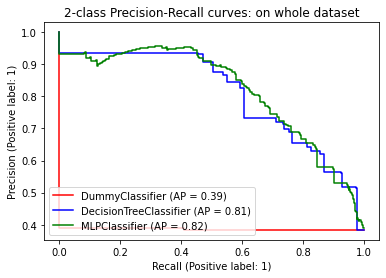

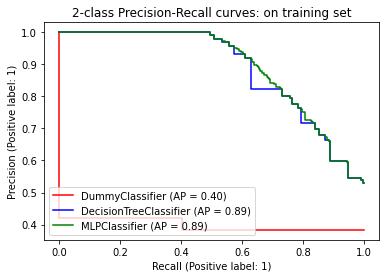

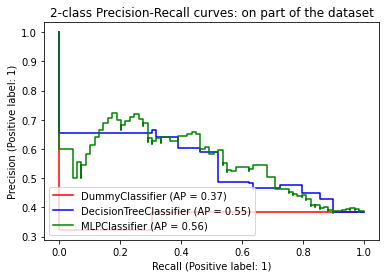

In [13]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

#none of the AP values match the onew from the graph ... why?

#average_precision_dummy = 
print("average_precision_dummy")
print(average_precision_score(y_test, dummy_clf.predict(X_test)))#all wrong
print(average_precision_score(y_train, dummy_clf.predict(X_train)))#all wrong
print(average_precision_score(train_label, dummy_clf.predict(train)))#all wrong
#average_precision_tree = 
print("\naverage_precision_tree")
print(average_precision_score(y_test, tree_clf.predict(X_test)))#all wrong
print(average_precision_score(y_train, tree_clf.predict(X_train)))#all wrong
print(average_precision_score(train_label, tree_clf.predict(train)))#all wrong
#average_precision_mlp = 
print("\naverage_precision_clf")
print(average_precision_score(y_test, mlp_clf.predict(X_test)))#all wrong
print(average_precision_score(y_train, mlp_clf.predict(X_train)))#all wrong
print(average_precision_score(train_label, mlp_clf.predict(train)))#all wrong


# i guess this one is right
plot_precision_recall_curve(dummy_clf, train, train_label, ax = plt.figure(0).gca(), color='red')#X_test, y_test, 
plot_precision_recall_curve(tree_clf, train, train_label, ax = plt.figure(0).gca(), color='blue')#X_test, y_test, 
plot_precision_recall_curve(mlp_clf, train, train_label, ax = plt.figure(0).gca(), color='green')#X_test, y_test, 
#plt.legend(loc = 'upper right')
plt.title('2-class Precision-Recall curves: on whole dataset')


# only on trainings-set
plot_precision_recall_curve(dummy_clf, X_train, y_train, ax = plt.figure(1).gca(), color='red')#X_test, y_test, 
plot_precision_recall_curve(tree_clf, X_train, y_train, ax = plt.figure(1).gca(), color='blue')#X_test, y_test, 
plot_precision_recall_curve(mlp_clf, X_train, y_train, ax = plt.figure(1).gca(), color='green')#X_test, y_test, 
#plt.legend(loc = 'upper right')
plt.title('2-class Precision-Recall curves: on training set')


# this is probably wrong
plot_precision_recall_curve(dummy_clf, X_test, y_test,  ax = plt.figure(2).gca(), color='red')
plot_precision_recall_curve(tree_clf, X_test, y_test, ax = plt.figure(2).gca(), color='blue')
plot_precision_recall_curve(mlp_clf, X_test, y_test, ax = plt.figure(2).gca(), color='green')
#plt.legend(loc = 'upper right')
plt.title('2-class Precision-Recall curves: on part of the dataset')

### 8.2

Erstellen sie für jedes Verfahren eine Confusion-Matrix, um Ihre Ergebnisse für die Testdaten besser einschätzen zu können.
Speichern Sie diese in Ihrem Ordner ab (am einfachsten per Drag&Drop).

In [14]:
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusionmatrix.ravel()

#dummy
dummymatrix = confusion_matrix(train_label, dummy_clf.predict(train))
print(dummymatrix)
dtn, dfp, dfn, dtp = dummymatrix.ravel()
print("\nDummys matrix:\ntrue negatives: " + str(dtn) + "\nfalse positives: " + str(dfp) + "\nfalse negatives: " + str(dfn) + "\ntrue positives: " + str(dtp) + "\n")

#tree
treematrix = confusion_matrix(train_label, tree_clf.predict(train))
print(treematrix)
ttn, tfp, tfn, ttp = treematrix.ravel()
print("\nDecisiontree matrix:\ntrue negatives: " + str(ttn) + "\nfalse positives: " + str(tfp) + "\nfalse negatives: " + str(tfn) + "\ntrue positives: " + str(ttp) + "\n")

#mlp
mlpmatrix = confusion_matrix(train_label, mlp_clf.predict(train))
print(mlpmatrix)
mtn, mfp, mfn, mtp = mlpmatrix.ravel()
print("\nMultilayer Perzepron matrix:\ntrue negatives: " + str(mtn) + "\nfalse positives: " + str(mfp) + "\nfalse negatives: " + str(mfn) + "\ntrue positives: " + str(mtp))
#print(confusion_matrix(train_label, mlp_clf.predict(train)))

[[347 202]
 [216 126]]

Dummys matrix:
true negatives: 347
false positives: 202
false negatives: 216
true positives: 126

[[505  44]
 [134 208]]

Decisiontree matrix:
true negatives: 505
false positives: 44
false negatives: 134
true positives: 208

[[504  45]
 [129 213]]

Multilayer Perzepron matrix:
true negatives: 504
false positives: 45
false negatives: 129
true positives: 213


Hier kurze Zusammenfassung bzw. Diskussion der Ergebnisse einfügen.

## Zusatzaufgabe

Optional: Wenden Sie das trainierte Verfahren auf die Testdaten des Titanic-Datensatzes an und laden Sie die dadurch „vorhersagten“ Werte in der Kaggle-Competition hoch (erfordert Kaggle-Account)

In [15]:
mlp_clf.predict(test)

merge = pd.read_csv("./Titanic/test.csv")
merge.insert(loc=1, column='Survived', value=mlp_clf.predict(test))

pd.DataFrame(merge).to_csv(r'supervised/completed_test_data.csv', index = False)

minimal = pd.DataFrame({'PassengerId': merge['PassengerId'], 'Survived': merge['Survived']})
pd.DataFrame(minimal).to_csv(r'supervised/predicted_death.csv', index = False)

print("shape: " + str(minimal.shape))
minimal.head()

shape: (418, 2)


PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         1

Hier kann nun eine .csv Tabelle ausgegeben werden, welche vorhersagt welce Personen im Testdatensatz sterben werden.



## Dokumentation

Speichern Sie Ihr Juypter-Notebook und laden Sie es im Moodle-Kurs hoch.